## A Two-stage Feature Selection method for Text Categorization

In [1]:
import pandas as pd
Corpus = pd.read_csv('Datasets/messages.csv')

In [2]:
Corpus.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizter
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, f1_score


#Import Seaborn
import seaborn as sns; 
sns.set()

#Import matplot library
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/shadowfox/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/shadowfox/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/shadowfox/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shadowfox/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /home/shadowfox/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

#Step 1. Remove stop words, punctuation, and non-alphanumeric text.

In [5]:
# Step - a : Remove blank rows if any.
# Corpus = Corpus[:1000]
Corpus['message'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['message'] = [entry.lower() for entry in Corpus['message']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['message'] = [word_tokenize(entry) for entry in Corpus['message']]

In [6]:
print(Corpus['message'][1])

['lang', 'classification', 'grimes', ',', 'joseph', 'e', '.', 'and', 'barbara', 'f', '.', 'grimes', ';', 'ethnologue', 'language', 'family', 'index', ';', 'pb', '.', 'isbn', ':', '0-88312', '-', '708', '-', '3', ';', 'vi', ',', '116', 'pp', '.', ';', '$', '14', '.', '00', '.', 'summer', 'institute', 'of', 'linguistics', '.', 'this', 'companion', 'volume', 'to', 'ethnologue', ':', 'languages', 'of', 'the', 'world', ',', 'twelfth', 'edition', 'lists', 'language', 'families', 'of', 'the', 'world', 'with', 'sub-groups', 'shown', 'in', 'a', 'tree', 'arrangement', 'under', 'the', 'broadest', 'classification', 'of', 'language', 'family', '.', 'the', 'language', 'family', 'index', 'facilitates', 'locating', 'language', 'names', 'in', 'the', 'ethnologue', ',', 'making', 'the', 'data', 'there', 'more', 'accessible', '.', 'internet', ':', 'academic', '.', 'books', '@', 'sil', '.', 'org', 'languages', ',', 'reference', 'lang', '&', 'culture', 'gregerson', ',', 'marilyn', ';', 'ritual', ',', 'belie

In [7]:
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['message']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop wLoadingords and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final0'] = str(Final_words)
    

In [8]:
print(Corpus['text_final0'])

0       ['content', 'length', 'research', 'center', 'u...
1       ['lang', 'classification', 'grime', 'joseph', ...
2       ['post', 'inquiry', 'sergei', 'atamas', 'satam...
3       ['colleague', 'research', 'differ', 'degree', ...
4       ['earlier', 'morning', 'phone', 'friend', 'min...
                              ...                        
2888    ['hello', 'thanks', 'stop', 'take', 'many', 'n...
2889    ['list', 'owner', 'kiddin', 'invite', 'join', ...
2890    ['judge', 'return', 'post', 'must', 'sound', '...
2891    ['gotcha', 'two', 'separate', 'fallacy', 'argu...
2892    ['hello', 'work', 'thesis', 'concern', 'attitu...
Name: text_final0, Length: 2893, dtype: object


In [9]:
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())
    
Corpus['text_final0'] = Corpus['text_final0'].apply(clean_sent)

print(Corpus['text_final0'])

0       [' content ', ' length ', ' research ', ' cent...
1       [' ', ' classification ', ' grime ', ' ', ' e ...
2       [' post ', ' inquiry ', ' ', ' ', ' ', ' ', ' ...
3       [' colleague ', ' research ', ' differ ', ' de...
4       [' ', ' morning ', ' phone ', ' friend ', ' mi...
                              ...                        
2888    [' hello ', ' thanks ', ' stop ', ' take ', ' ...
2889    [' list ', ' owner ', ' ', ' invite ', ' join ...
2890    [' judge ', ' return ', ' post ', ' must ', ' ...
2891    [' ', ' two ', ' separate ', ' fallacy ', ' ar...
2892    [' hello ', ' work ', ' thesis ', ' concern ',...
Name: text_final0, Length: 2893, dtype: object


In [10]:
def FCD(Corpus, max_features):
  Corpus_sorted = Corpus.sort_values(by=['label'])
  print(Corpus_sorted['label'])

#Splitting data into Training and Testing data


In [11]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final0'],Corpus['label'],test_size=0.3, random_state = 42)

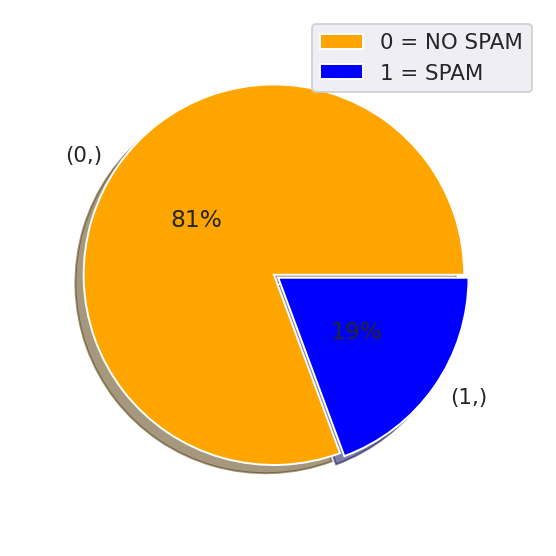

In [12]:
df = pd.DataFrame(Test_Y)
lb=df.value_counts().index.tolist()
val=df.value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [13]:
print(Corpus.shape)
print(Train_Y)

(2893, 4)
2215    0
1210    0
821     0
343     0
2655    0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: label, Length: 2025, dtype: int64


# Step 2. Calculate the normalized TFIDF in the corresponding element of the weight matrix.

In [14]:
Tfidf_vect = TfidfVectorizer(max_features=15000)
Tfidf_vect.fit(Corpus['text_final0'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)   
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# Step 4.Calculating LSI(SVD) for Output of TF-IDF

In [30]:
import sklearn
from sklearn.decomposition import TruncatedSVD
acc_val = []
steps = list(range(2,250))
             
for i in steps:
    SVD = sklearn.decomposition.TruncatedSVD(n_components=i, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
    SVD.fit(Train_X_Tfidf)
    Train_X_SVD = SVD.transform(Train_X_Tfidf)
    Test_X_SVD = SVD.transform(Test_X_Tfidf
    
    from sklearn import svm
    clf = svm.SVC()
    clf.fit(Train_X_SVD, Train_Y)
    acc_val.append(clf.score(Test_X_SVD,Test_Y)*100)  

In [16]:
# from sklearn.utils.extmath import randomized_svd

# U, Sigma, VT = randomized_svxd(Train_X_Tfidf, 
#                               n_components=15,
#                               n_iter=5,
#                               random_state=None)
# Train_X_SVD = U

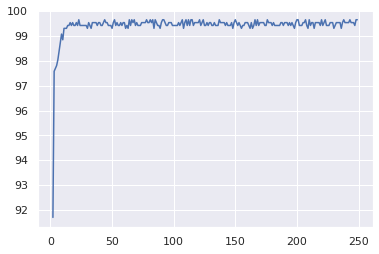

In [31]:
plt.plot(steps, acc_val)

In [17]:
print(Train_X_SVD.shape)
print(Test_X_SVD.shape)

(2025, 20)
(868, 20)


In [18]:
# from sklearn.ensemble import RandomForestClassifier

# vectorizer = TfidfVectorizer(max_df=0.5, stop_words='english', use_idf=True)
# lsa = TruncatedSVD(n_components=20)
# Tfidf_vect.fit(Corpus['text_final0'])

# train_text = vectorizer.fit_transform(Train_X)
# test_text = vectorizer.fit_transform(Test_X)

# train_text = lsa.fit_transform(train_text)
# test_text = lsa.fit_transform(test_text)


# clf = RandomForestClassifier(max_depth=20, random_state=0)
# clf.fit(train_text, Train_Y)
# clf.score(test_text,Test_Y)

#Step5. Passing the SVD output to ML model for training and testing 

#5.1 RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(Train_X_SVD, Train_Y)
clf.score(Test_X_SVD,Test_Y)

0.9850230414746544

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(Train_X_Tfidf, Train_Y)
clf.score(Test_X_Tfidf,Test_Y)

0.9412442396313364

# 5.2 SVM

In [21]:
from sklearn import svm
clf = svm.SVC()
clf.fit(Train_X_SVD, Train_Y)
clf.score(Test_X_SVD,Test_Y)

0.9953917050691244

In [22]:
from sklearn import svm
clf = svm.SVC()
clf.fit(Train_X_Tfidf, Train_Y)
clf.score(Test_X_Tfidf,Test_Y)

0.9758064516129032